# Paintings

Imports for the project :

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import PIL

# Load data and display images

In [22]:
# Check if data folder ok
! ls

 data					    ' Paintings.ipynb'
 paintings_denoising_lyrics_detector.ipynb   README.md


In [23]:
# Paths and names of images
import glob
dataset_paths = glob.glob('./data/*.jpg')
dataset_paths

['./data/Kazimir_Malevich_13.jpg',
 './data/Jan_van_Eyck_15.jpg',
 './data/Albrecht_Duâ\x95\xa0Ãªrer_34.jpg',
 './data/Edgar_Degas_271.jpg',
 './data/Albrecht_DuÌ\x88rer_244.jpg',
 './data/Edgar_Degas_228.jpg',
 './data/Marc_Chagall_101.jpg',
 './data/Leonardo_da_Vinci_50.jpg',
 './data/Henri_Matisse_186.jpg',
 './data/Edgar_Degas_538.jpg',
 './data/Edgar_Degas_516.jpg',
 './data/Diego_Rivera_3.jpg',
 './data/Francisco_Goya_87.jpg',
 './data/Francisco_Goya_278.jpg',
 './data/Francisco_Goya_43.jpg',
 './data/Rembrandt_145.jpg',
 './data/Mikhail_Vrubel_99.jpg',
 './data/Alfred_Sisley_150.jpg',
 './data/Leonardo_da_Vinci_72.jpg',
 './data/Amedeo_Modigliani_52.jpg',
 './data/Francisco_Goya_155.jpg',
 './data/Albrecht_DuÌ\x88rer_301.jpg',
 './data/Eugene_Delacroix_28.jpg',
 './data/Albrecht_Duâ\x95\xa0Ãªrer_158.jpg',
 './data/Alfred_Sisley_136.jpg',
 './data/Rembrandt_253.jpg',
 './data/Albrecht_DuÌ\x88rer_129.jpg',
 './data/Edgar_Degas_68.jpg',
 './data/Albrecht_DuÌ\x88rer_316.jpg'

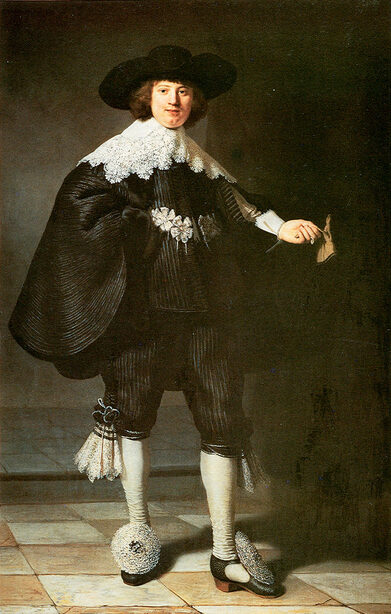

In [26]:
# Display of one image
img = PIL.Image.open(dataset_paths[15])
img

In [27]:
# Image shape
img_shape = np.shape(img)
img_shape

(614, 391, 3)

In [28]:
# Image dimension
img_dim = np.array(img).ndim
img_dim

3

# Processing